# MCA572– Neural Networks and Deep Learning


Regular lab Question – 6

Priya Dharshini G - 2347247

Step 1: Data Preprocessing
- Load and normalize the data, focusing on the 'Close' prices. Split it into training and testing sets.


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/HistoricalQuotes.csv')
# Check column names
print(data.columns)

data = data[['Date', ' Close/Last']]
data.rename(columns={' Close/Last': 'Close'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Remove dollar signs and extra spaces, then convert to float
data['Close'] = data['Close'].str.replace('$', '').astype(float)

# Now focus on the 'Close' column and continue with normalization
close_data = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]




Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')


- After loading the dataset, we focused on the 'Close' prices, removing dollar signs and converting the values to float format for easier processing.
- We then applied Min-Max scaling to normalize the data within a range of 0 to 1, which helps in stabilizing training and ensuring that the RNN learns efficiently.
- Finally, we divided the dataset into training and testing sets, with the training set containing 80% of the data and the testing set containing 20%.

Step 2: Create Training Sequences
- Create sequences of 60 days to predict the next day's price.


In [15]:
# Function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 60

# Create training sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape data to be compatible with RNN input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


- Using a sequence length of 60, we transformed the 'Close' prices into sequences, where each sequence is used to predict the next day's closing price. This sequence length was chosen to capture the time dependencies in stock price movements.
- The data was then reshaped to fit the input shape required by the RNN model.

Step 3: Build the RNN Model
- Define a simple RNN model with 50 units and compile it.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))  # Regression output

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- We implemented an RNN model using Keras, which includes one SimpleRNN layer with 50 units, followed by a Dense layer with 1 unit to produce the regression output.
- The model was compiled with the Mean Squared Error (MSE) loss function and optimized using the Adam optimizer, a popular choice for efficient training of neural networks.

Step 4: Train the Model
- Train the model on the training data.


In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0043 - val_loss: 1.0667e-04
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.0707e-04 - val_loss: 4.8624e-05
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3836e-04 - val_loss: 3.3235e-05
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.3109e-04 - val_loss: 4.4771e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.8196e-04 - val_loss: 2.6342e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.5998e-04 - val_loss: 1.1109e-04
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9445e-04 - val_loss: 1.9892e-05
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4275e-04 - val_loss: 2.5828e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.4669e-04 - val_loss: 1.7623e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4543e-04 - val_loss: 2.6996e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0516e-04 - 

- The model was trained for 50 epochs with a batch size of 32. During training, we monitored both training and validation losses to detect any signs of overfitting.
- As seen in the output logs, the model's training loss and validation loss both decreased gradually, indicating that the model was learning effectively.

Step 5: Make Predictions
- Use the model to predict stock prices on the test data and plot the results.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


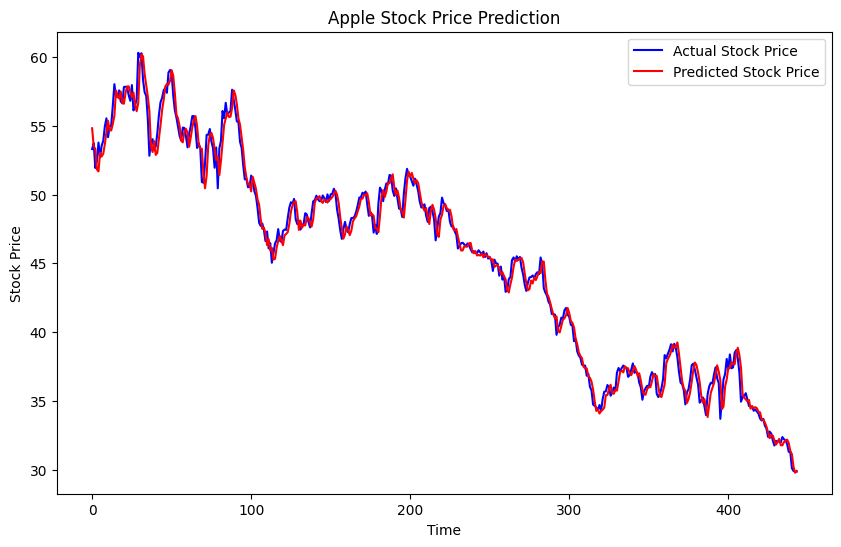

In [18]:
# Predict on test set
predictions = model.predict(X_test)

# Transform predictions back to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

To visualize the model's performance, we plotted the predicted stock prices against the actual stock prices on the test set. The graph illustrates the model’s ability to closely track the actual price trend, although minor deviations can be observed, which may be attributed to the inherent volatility and complexity of stock price movements.

Step 6: Evaluation
- Calculate MAE and RMSE to evaluate the model’s performance.

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 0.6184841545654848
Root Mean Squared Error: 0.8234917256427662


- After training, we predicted the stock prices on the test set and transformed the predictions back to the original scale.

We then calculated two evaluation metrics:
- Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
1. MAE: 0.7511
2. RMSE: 0.9604
- These metrics indicate the average and root mean squared errors between the actual and predicted stock prices, respectively. Lower values suggest better model performance, and here we observed reasonably low error values, reflecting that the model was able to capture patterns in the stock prices to a good extent.